In [1]:
# Let's read the file which contains the price of bitcoin
import numpy as np
import pandas as pd
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])  # Telling pandas that column data is containing date

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [3]:
# How many samples do we have in our train data
len(df)

2787

In [146]:
# only want closing price for each day and rename it
bitcoin_pirces = pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_pirces.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Price of Bitcoin from 1-10-2013 - 2021')

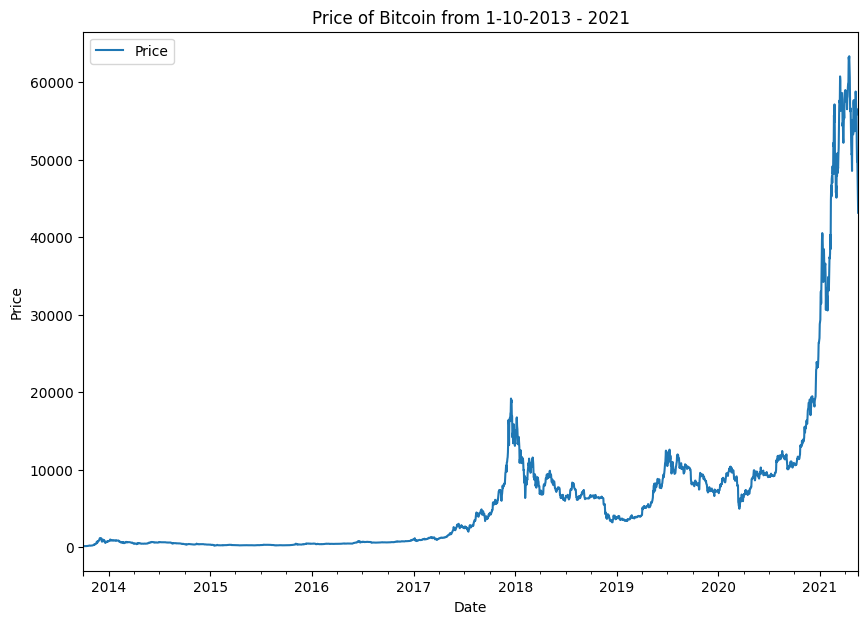

In [5]:
# Visualize the data
import matplotlib.pyplot as plt
bitcoin_pirces.plot(figsize=(10, 7))
plt.ylabel("Price")
plt.title("Price of Bitcoin from 1-10-2013 - 2021")

In [6]:
# Importing time series data with python's csv module
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader)  # To skip the first row (which is the row of titles)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))  # get the date as date not string
        btc_price.append(float(line[2]))  # Get the closing price as float

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

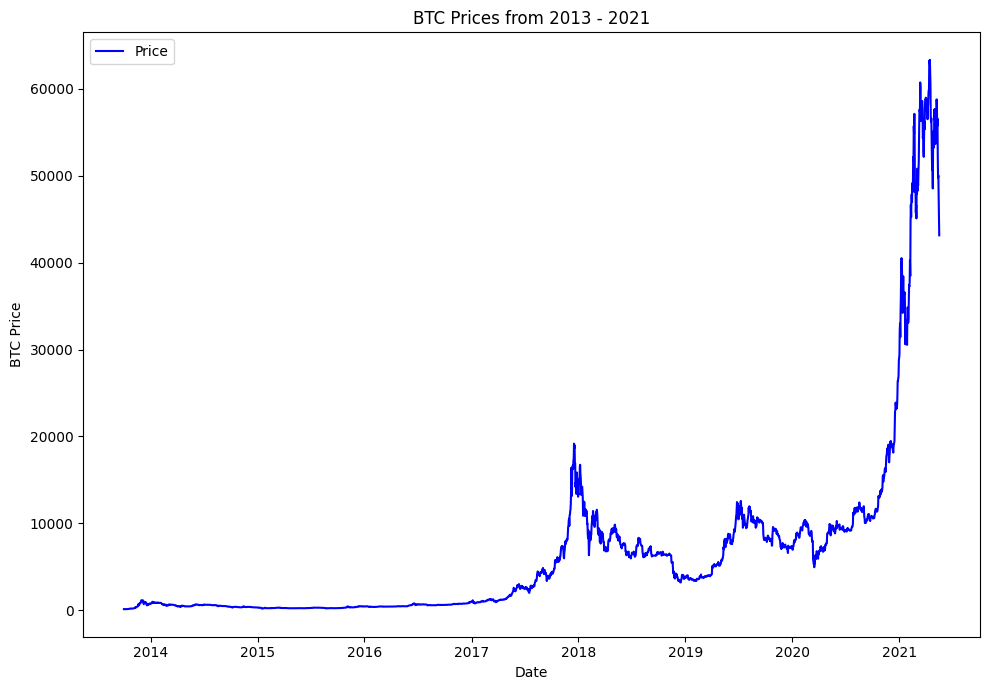

In [7]:
# Let's visualize the plots
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price, label="Price", c="blue")
plt.title("BTC Prices from 2013 - 2021")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# Creating train and test sets with time series data (the wrong way)
# Get bitcoin data array
timesteps = bitcoin_pirces.index.to_numpy()
prices = bitcoin_pirces['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [9]:
# The wrong way to make train/test for time series data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    timesteps,  # Dates
    prices,  #Price
    test_size=0.2,
    random_state=42
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

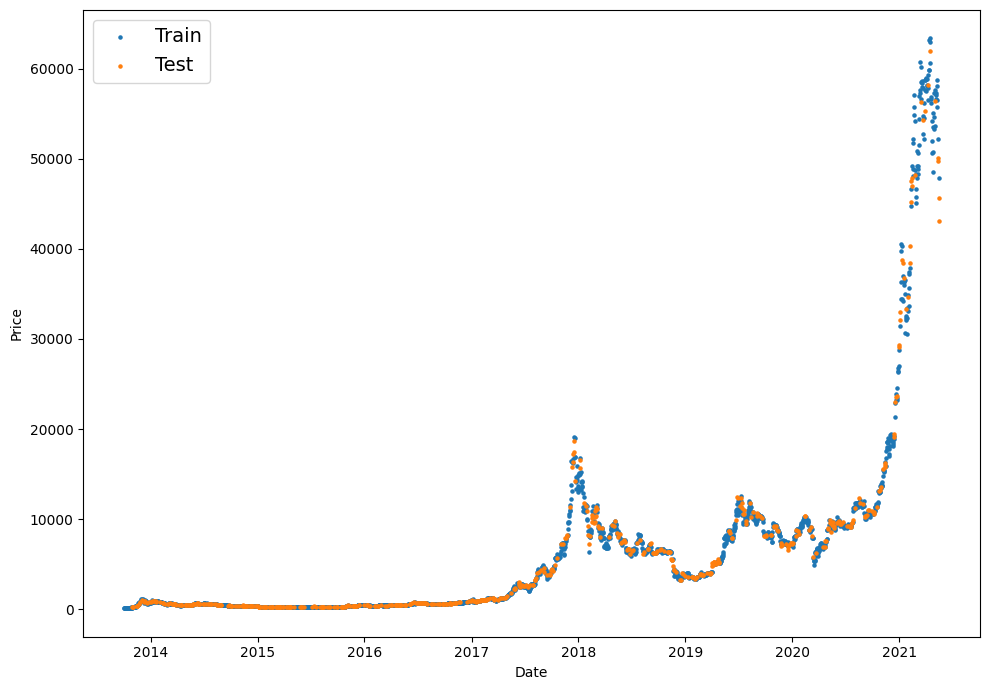

In [10]:
# Let's plot the wrong split for train and test set
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, s=5,label="Train")
plt.scatter(x_test, y_test, s=5,label="Test")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

You can see from the graph above, that is random distribution for the train and test values

In [11]:
# Create the train and test splits the right way for time series data:
split_size = int(0.8 * len(prices))  # make 80%

# Create train data split
x_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data split
x_test, y_test = timesteps[split_size:], prices[split_size:]

len(x_train), len(x_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

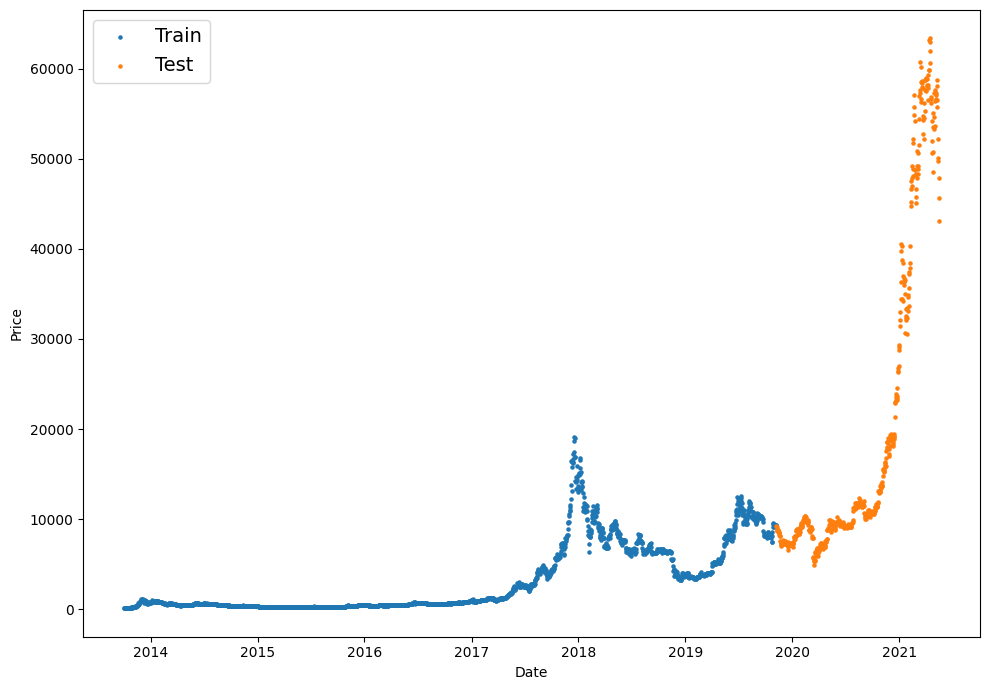

In [12]:
# Let's plot the right split for train and test set
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, s=5,label="Train")
plt.scatter(x_test, y_test, s=5,label="Test")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

### Creating plotting function

typing plotting code is tedious, let's function it

In [13]:
# Create function to plot time series data:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    Plots timesteps (a series of points in time) against values (a series of values across timesteps)
    :param timesteps: array of timesteps values
    :param values: array of values across time
    :param format:style of the plot, default is "."
    :param start:where to start the plot
    :param end: where to end the plot
    :param label:label to show on plot about values
    :return: plot of the time series
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC-Price")
    plt.title("BTC-Price from 2013-2021")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

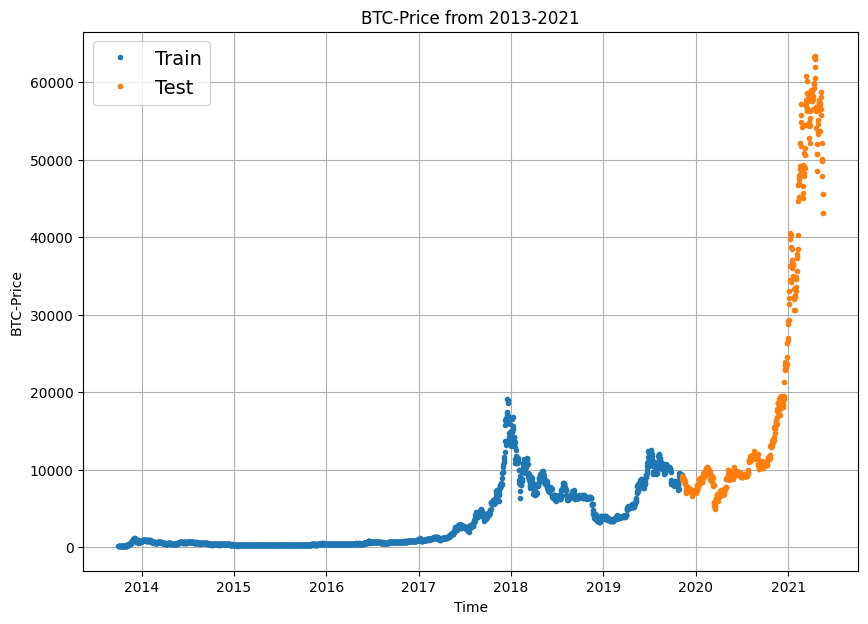

In [14]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(x_train, y_train,label="Train")
plot_time_series(x_test, y_test,label="Test")

## Model 0: Naive model (baseline model)

In [15]:
# Create a naive forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

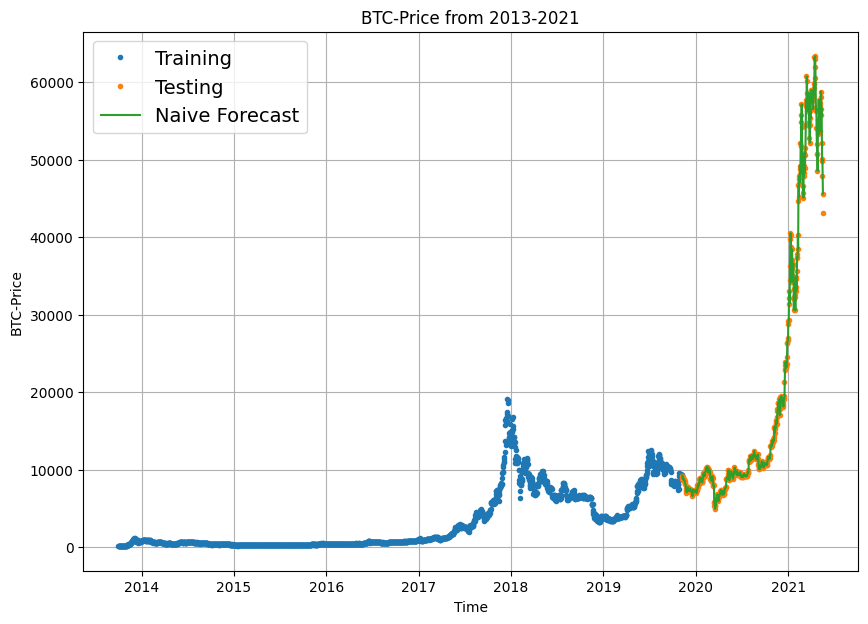

In [16]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(x_train, y_train, label="Training")
plot_time_series(x_test, y_test, label="Testing ")
plot_time_series(x_test[1:], naive_forecast, format="-", label="Naive Forecast")

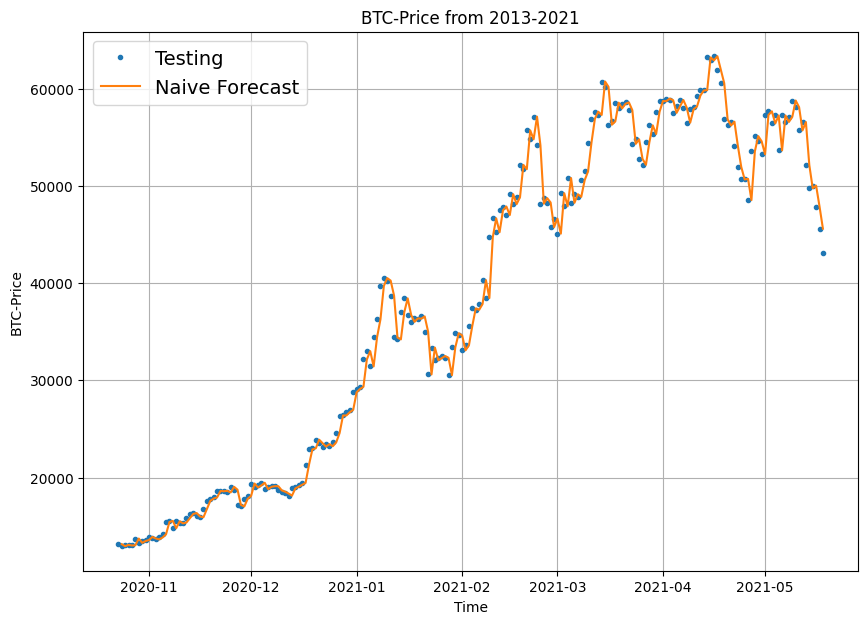

In [17]:
# Make some zoom on the test and naive plot by starting at 350
plt.figure(figsize=(10, 7))
plot_time_series(x_test, y_test, start=350, label="Testing ")
plot_time_series(x_test[1:], naive_forecast,start=350, format="-", label="Naive Forecast")

## Preprocessing the data for the deep learning model

You can note that is the naive is just shifting the test values by one index, and this model is hard to beat, so predicting the next step as the previous timestep.

In [18]:
# MASE implementation because tensorflow doesn't have function of it
import tensorflow as tf
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implementing MASE (assuming no seasonality of data).
    :param y_true: The true labels
    :param y_pred: The predicted labels
    :return: mae / mae_naive_no_season
    """
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))

    #Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))  # our seasonality is 1 day (hence the shift of 1)

    return mae / mae_naive_no_season

mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182626

In [19]:
# Create function to take in model prediction and truth values and return evaluation metrics
def evaluate_preds(y_true, y_preds):
    # Make sure float32 datatype (for metrics calculation)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_preds = tf.cast(y_preds, dtype=tf.float32)

    # Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_preds)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_preds)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_preds)
    mase = mean_absolute_scaled_error(y_true, y_preds)

    return {
        "mae":mae.numpy(),
        "mape":mape.numpy(),
        "mase":mase.numpy(),
        "mse":mse.numpy(),
        "rmse":rmse.numpy()
    }

In [20]:
# Evaluating the naive model
naive_results = evaluate_preds(y_true=y_test[1:], y_preds=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.5165248,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

Let's build a function to windowing our dataset

In [21]:
# Lets setup global variable for window and horizon
HORIZON = 1  # Predict next 1 day
WINDOW_SIZE = 7  # use the past week of bitcoin data to make the prediction

# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [22]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [23]:
# Create function to view numpy as windows
import numpy as np
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon  size labels.
    :param x: Time series dataset
    :param window_size: The size of the window
    :param horizon: the labels size
    :return: numpy array 2D
    """
    # 1. Create a window of specified window_size (add the horizon on the end for labelling later)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

    # 2. Create a 2D of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T  # Create 2D array of windows of size windows size
    # print(f"Window indexes:\n{window_indexes, window_indexes.shape}")

    # 3. Index on the target array (a time series) with 2D of multiple window steps
    windowed_array = x[window_indexes]

    # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels

In [24]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [25]:
full_windows[:10]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966],
       [120.65533, 121.795  , 123.033  , 124.049  , 125.96116, 125.27966,
        125.9275 ],
       [121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333],
       [123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199],
       [124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333],
       [125.96116, 125.27966, 125.9275 , 126.38333, 135.24199, 133.20333,
        142.76333]])

In [26]:
full_labels[:10]

array([[123.033  ],
       [124.049  ],
       [125.96116],
       [125.27966],
       [125.9275 ],
       [126.38333],
       [135.24199],
       [133.20333],
       [142.76333],
       [137.92333]])

In [27]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [28]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [29]:
# Turning windows into training and test sets
def make_train_test_split(windows, labels, test_split=0.2):
    'split matching pairs into train and test split'
    split_size = int(len(windows) * (1 - test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [30]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels,test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [31]:
# Create model checkpoint
import os
#Create a function to implement a model checkpoint callback with specific filename
def create_model_checkpoint(model_name, save_path="Time-Series model checkpoint/"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor="val_loss",
                                              verbose=0,
                                              save_best_only=True)

# Model 1

model 1: Dense model (window = 7, horizon = 1)

In [32]:
import tensorflow as tf
from keras import layers

# Set random seed for as reproducible result as possible
tf.random.set_seed(42)

# 1. Construct the model
model_1 = tf.keras.models.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# 2. Compile the model
model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae', 'mse']
)

# 3. fit the model
history_model_1 = model_1.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_1.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 7s - loss: 2725.4353 - mae: 2725.4353 - mse: 15346876.0000

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 1s 43ms/step - loss: 1036.6697 - mae: 1036.6697 - mse: 4049258.7500 - val_loss: 2492.2292 - val_mae: 2492.2292 - val_mse: 14477178.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 371.5544 - mae: 371.5544 - mse: 623417.8750

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 22ms/step - loss: 266.6282 - mae: 266.6282 - mse: 311218.8750 - val_loss: 985.7082 - val_mae: 985.7082 - val_mse: 3145633.2500
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 131.6003 - mae: 131.6003 - mse: 73779.0234

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 181.0299 - mae: 181.0299 - mse: 159035.3906 - val_loss: 957.7409 - val_mae: 957.7409 - val_mse: 2955338.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 204.0219 - mae: 204.0219 - mse: 191287.8281

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 20ms/step - loss: 169.9364 - mae: 169.9364 - mse: 152178.5625 - val_loss: 906.7675 - val_mae: 906.7675 - val_mse: 2748272.2500
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 165.8138 - mae: 165.8138 - mse: 90060.6094

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 160.5894 - mae: 160.5894 - mse: 139037.4531 - val_loss: 874.3105 - val_mae: 874.3105 - val_mse: 2553587.7500
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 119.4512 - mae: 119.4512 - mse: 56484.8086

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 156.6980 - mae: 156.6980 - mse: 131253.6719 - val_loss: 849.6647 - val_mae: 849.6647 - val_mse: 2412979.7500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 179.3376 - mae: 179.3376 - mse: 239457.7500

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 20ms/step - loss: 150.3920 - mae: 150.3920 - mse: 122884.0547 - val_loss: 838.6310 - val_mae: 838.6310 - val_mse: 2288950.7500
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 126.1633 - mae: 126.1633 - mse: 61827.1133

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 145.6833 - mae: 145.6833 - mse: 116208.2266 - val_loss: 804.0121 - val_mae: 804.0121 - val_mse: 2181833.2500
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 144.5293 - mae: 144.5293 - mse: 114054.1250 - val_loss: 818.7878 - val_mae: 818.7878 - val_mse: 2092059.8750
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 153.4543 - mae: 153.4543 - mse: 162633.9531

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 139.3916 - mae: 139.3916 - mse: 108386.8750 - val_loss: 767.4259 - val_mae: 767.4259 - val_mse: 1914862.5000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 143.7543 - mae: 143.7543 - mse: 92265.7500

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 133.8102 - mae: 133.8102 - mse: 99455.6562 - val_loss: 735.7368 - val_mae: 735.7367 - val_mse: 1795058.3750
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 129.8040 - mae: 129.8040 - mse: 95446.6250 - val_loss: 794.7776 - val_mae: 794.7776 - val_mse: 1888061.7500
Epoch 13/100
18/18 [==============================] - 0s 2ms/step - loss: 129.8071 - mae: 129.8071 - mse: 95505.7734 - val_loss: 748.3413 - val_mae: 748.3413 - val_mse: 1736870.5000
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 132.2816 - mae: 132.2816 - mse: 74568.9219

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 124.6354 - mae: 124.6354 - mse: 88644.0625 - val_loss: 711.6451 - val_mae: 711.6451 - val_mse: 1619930.1250
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 118.2444 - mae: 118.2444 - mse: 53050.1875

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 124.3067 - mae: 124.3067 - mse: 87310.8984 - val_loss: 667.0070 - val_mae: 667.0070 - val_mse: 1510379.7500
Epoch 16/100
18/18 [==============================] - 0s 2ms/step - loss: 120.2541 - mae: 120.2541 - mse: 82648.8984 - val_loss: 687.3926 - val_mae: 687.3926 - val_mse: 1517694.7500
Epoch 17/100
18/18 [==============================] - 0s 2ms/step - loss: 118.5673 - mae: 118.5673 - mse: 82519.8984 - val_loss: 675.4291 - val_mae: 675.4291 - val_mse: 1473752.6250
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 131.3120 - mae: 131.3120 - mse: 89164.1719

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 116.4695 - mae: 116.4695 - mse: 80380.9297 - val_loss: 628.7492 - val_mae: 628.7492 - val_mse: 1369243.0000
Epoch 19/100
18/18 [==============================] - 0s 2ms/step - loss: 115.9888 - mae: 115.9888 - mse: 79258.2109 - val_loss: 759.2524 - val_mae: 759.2524 - val_mse: 1666590.8750
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 132.5677 - mae: 132.5677 - mse: 88773.6406

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 20ms/step - loss: 115.3604 - mae: 115.3604 - mse: 76633.9844 - val_loss: 613.0987 - val_mae: 613.0987 - val_mse: 1307811.2500
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 117.2719 - mae: 117.2719 - mse: 68060.9062

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 20ms/step - loss: 115.6217 - mae: 115.6217 - mse: 78640.8125 - val_loss: 606.1591 - val_mae: 606.1591 - val_mse: 1295319.0000
Epoch 22/100
18/18 [==============================] - 0s 2ms/step - loss: 113.8101 - mae: 113.8101 - mse: 76890.3750 - val_loss: 623.8065 - val_mae: 623.8065 - val_mse: 1313098.0000
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 118.3374 - mae: 118.3374 - mse: 59304.6016

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 113.7548 - mae: 113.7548 - mse: 75258.3047 - val_loss: 600.4096 - val_mae: 600.4096 - val_mse: 1271800.5000
Epoch 24/100
18/18 [==============================] - 0s 2ms/step - loss: 111.6555 - mae: 111.6555 - mse: 75851.1484 - val_loss: 607.9077 - val_mae: 607.9077 - val_mse: 1277066.8750
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 121.9501 - mae: 121.9501 - mse: 60314.6055

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 109.9781 - mae: 109.9781 - mse: 73472.2734 - val_loss: 597.0119 - val_mae: 597.0119 - val_mse: 1252546.5000
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 108.0774 - mae: 108.0774 - mse: 51337.3203

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 112.7065 - mae: 112.7065 - mse: 73674.0781 - val_loss: 590.2404 - val_mae: 590.2404 - val_mse: 1240323.1250
Epoch 27/100
18/18 [==============================] - 0s 2ms/step - loss: 114.8180 - mae: 114.8180 - mse: 74548.8750 - val_loss: 594.3527 - val_mae: 594.3527 - val_mse: 1238330.8750
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 98.5533 - mae: 98.5533 - mse: 62940.0547

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 20ms/step - loss: 109.7363 - mae: 109.7363 - mse: 72681.8125 - val_loss: 588.6339 - val_mae: 588.6339 - val_mse: 1240279.7500
Epoch 29/100
18/18 [==============================] - 0s 2ms/step - loss: 109.2523 - mae: 109.2523 - mse: 73151.6953 - val_loss: 596.6857 - val_mae: 596.6857 - val_mse: 1238069.6250
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 119.1935 - mae: 119.1935 - mse: 74251.3672

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 20ms/step - loss: 111.1734 - mae: 111.1734 - mse: 73025.0859 - val_loss: 581.9271 - val_mae: 581.9271 - val_mse: 1218172.1250
Epoch 31/100
18/18 [==============================] - 0s 2ms/step - loss: 111.5180 - mae: 111.5180 - mse: 71851.8125 - val_loss: 618.3353 - val_mae: 618.3353 - val_mse: 1275352.0000
Epoch 32/100
18/18 [==============================] - 0s 2ms/step - loss: 111.4899 - mae: 111.4899 - mse: 74295.3594 - val_loss: 585.4341 - val_mae: 585.4341 - val_mse: 1212946.3750
Epoch 33/100
18/18 [==============================] - 0s 2ms/step - loss: 108.3883 - mae: 108.3883 - mse: 70996.9297 - val_loss: 586.9595 - val_mae: 586.9595 - val_mse: 1213841.1250
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 123.5636 - mae: 123.5636 - mse: 112476.6406

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 20ms/step - loss: 109.4258 - mae: 109.4258 - mse: 72481.5938 - val_loss: 576.7922 - val_mae: 576.7922 - val_mse: 1204980.5000
Epoch 35/100
18/18 [==============================] - 0s 2ms/step - loss: 109.0989 - mae: 109.0989 - mse: 70961.0547 - val_loss: 581.2592 - val_mae: 581.2592 - val_mse: 1202290.6250
Epoch 36/100
18/18 [==============================] - 0s 2ms/step - loss: 118.4604 - mae: 118.4604 - mse: 76273.7109 - val_loss: 601.6495 - val_mae: 601.6495 - val_mse: 1236236.8750
Epoch 37/100
18/18 [==============================] - 0s 2ms/step - loss: 111.8230 - mae: 111.8230 - mse: 73943.0859 - val_loss: 577.6463 - val_mae: 577.6463 - val_mse: 1196955.5000
Epoch 38/100
18/18 [==============================] - 0s 2ms/step - loss: 112.3305 - mae: 112.3305 - mse: 71871.1484 - val_loss: 604.1200 - val_mae: 604.1200 - val_mse: 1263185.7500
Epoch 39/100
18/18 [==============================] - 0s 2ms/step - loss: 111.9757 - mae: 111.9757 - m

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 20ms/step - loss: 107.7589 - mae: 107.7589 - mse: 68923.5625 - val_loss: 573.6522 - val_mae: 573.6522 - val_mse: 1187533.5000
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 107.6368 - mae: 107.6368 - mse: 70370.1328 - val_loss: 602.5920 - val_mae: 602.5920 - val_mse: 1231878.1250
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 95.6249 - mae: 95.6249 - mse: 50885.2188

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 20ms/step - loss: 106.8426 - mae: 106.8426 - mse: 70193.9297 - val_loss: 572.5721 - val_mae: 572.5721 - val_mse: 1182137.7500
Epoch 49/100
18/18 [==============================] - 0s 2ms/step - loss: 108.9266 - mae: 108.9266 - mse: 70856.5312 - val_loss: 598.7814 - val_mae: 598.7814 - val_mse: 1223967.7500
Epoch 50/100
18/18 [==============================] - 0s 2ms/step - loss: 111.5658 - mae: 111.5658 - mse: 71229.3203 - val_loss: 657.8701 - val_mae: 657.8701 - val_mse: 1389714.3750
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 110.1003 - mae: 110.1003 - mse: 71068.3203 - val_loss: 594.9930 - val_mae: 594.9930 - val_mse: 1214381.0000
Epoch 52/100
18/18 [==============================] - 0s 2ms/step - loss: 108.6316 - mae: 108.6316 - mse: 71449.3828 - val_loss: 574.7521 - val_mae: 574.7521 - val_mse: 1198248.0000
Epoch 53/100
18/18 [==============================] - 0s 2ms/step - loss: 109.7703 - mae: 109.7703 - m

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 108.2018 - mae: 108.2018 - mse: 68900.2266 - val_loss: 567.6682 - val_mae: 567.6682 - val_mse: 1173733.5000
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 106.8025 - mae: 106.8025 - mse: 68799.7812 - val_loss: 576.4316 - val_mae: 576.4316 - val_mse: 1186707.2500
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 105.9191 - mae: 105.9191 - mse: 68748.5312 - val_loss: 586.2755 - val_mae: 586.2755 - val_mse: 1196586.1250
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 127.5120 - mae: 127.5120 - mse: 158935.5000

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 20ms/step - loss: 108.1320 - mae: 108.1320 - mse: 70470.5312 - val_loss: 566.1669 - val_mae: 566.1669 - val_mse: 1172108.8750
Epoch 66/100
18/18 [==============================] - 0s 2ms/step - loss: 107.6593 - mae: 107.6593 - mse: 68950.9922 - val_loss: 568.8197 - val_mae: 568.8197 - val_mse: 1179098.8750
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 106.6745 - mae: 106.6745 - mse: 68913.4219 - val_loss: 598.4752 - val_mae: 598.4752 - val_mse: 1244357.7500
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 111.2119 - mae: 111.2119 - mse: 69298.3203 - val_loss: 642.4428 - val_mae: 642.4428 - val_mse: 1346622.3750
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 117.9839 - mae: 117.9839 - mse: 75579.8750 - val_loss: 576.4011 - val_mae: 576.4011 - val_mse: 1196648.0000
Epoch 70/100
18/18 [==============================] - 0s 2ms/step - loss: 126.2112 - mae: 126.2112 - m

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 21ms/step - loss: 106.1183 - mae: 106.1183 - mse: 69066.6719 - val_loss: 566.1660 - val_mae: 566.1660 - val_mse: 1174059.5000
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 123.7314 - mae: 123.7314 - mse: 128212.3984

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 29ms/step - loss: 106.3086 - mae: 106.3086 - mse: 68291.4844 - val_loss: 565.4972 - val_mae: 565.4972 - val_mse: 1170509.6250
Epoch 74/100
18/18 [==============================] - 0s 2ms/step - loss: 105.5212 - mae: 105.5212 - mse: 68472.3125 - val_loss: 567.2908 - val_mae: 567.2908 - val_mse: 1174787.0000
Epoch 75/100
18/18 [==============================] - 0s 2ms/step - loss: 106.1177 - mae: 106.1177 - mse: 68585.2422 - val_loss: 586.6251 - val_mae: 586.6251 - val_mse: 1195750.2500
Epoch 76/100
18/18 [==============================] - 0s 2ms/step - loss: 106.9363 - mae: 106.9363 - mse: 69450.9375 - val_loss: 565.8047 - val_mae: 565.8047 - val_mse: 1170123.2500
Epoch 77/100
18/18 [==============================] - 0s 2ms/step - loss: 105.2810 - mae: 105.2810 - mse: 68016.0859 - val_loss: 576.9637 - val_mae: 576.9637 - val_mse: 1196203.2500
Epoch 78/100
18/18 [==============================] - 0s 2ms/step - loss: 106.5954 - mae: 106.5954 - m

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_1_dense\assets


18/18 [==============================] - 0s 20ms/step - loss: 104.6534 - mae: 104.6534 - mse: 67701.8516 - val_loss: 564.5116 - val_mae: 564.5116 - val_mse: 1163235.6250
Epoch 82/100
18/18 [==============================] - 0s 2ms/step - loss: 113.6628 - mae: 113.6628 - mse: 74274.9609 - val_loss: 566.4681 - val_mae: 566.4681 - val_mse: 1167841.0000
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 109.3381 - mae: 109.3381 - mse: 70244.2578 - val_loss: 628.4720 - val_mae: 628.4720 - val_mse: 1308606.3750
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 108.9800 - mae: 108.9800 - mse: 70608.8984 - val_loss: 566.0119 - val_mae: 566.0119 - val_mse: 1165233.7500
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 107.0775 - mae: 107.0775 - mse: 69408.1562 - val_loss: 571.5195 - val_mae: 571.5195 - val_mse: 1168691.3750
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 106.1105 - mae: 106.1105 - m

In [33]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 704us/step - loss: 623.0634 - mae: 623.0634 - mse: 1262886.5000


[623.0633544921875, 623.0633544921875, 1262886.5]

In [34]:
#Load in saved best performing model_1 and evaluate it on the test dataset
model_1 = tf.keras.models.load_model("Time-Series model checkpoint/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 763us/step - loss: 564.5117 - mae: 564.5117 - mse: 1163235.5000


[564.5116577148438, 564.5116577148438, 1163235.5]

In [36]:
# Making function to make prediction with the model
def make_predictions(model, input_data):
    'Uses model to make prediction on input data'
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)  # return 1D array of predictions

In [39]:
# Make predictions using model_1 on the test dataset and view result
model_1_preds = make_predictions(model=model_1, input_data=test_windows)
model_1_preds[:10], len(model_1_preds)

18/18 [==============================] - 0s 626us/step


(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8847.3  , 8764.513, 9023.135, 8789.302, 8745.724, 8726.953,
        8679.839, 8510.288, 8458.823, 8518.681], dtype=float32)>,
 556)

In [40]:
test_labels[:10], model_1_preds[:10]

(array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102],
        [8656.97092235],
        [8500.64355816],
        [8469.2608989 ],
        [8537.33965197],
        [8205.80636599]]),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8847.3  , 8764.513, 9023.135, 8789.302, 8745.724, 8726.953,
        8679.839, 8510.288, 8458.823, 8518.681], dtype=float32)>)

In [42]:
# Evaluate the model_1
model_1_results = evaluate_preds(y_true=test_labels, y_preds=model_1_preds)
model_1_results

{'mae': array([11939.04  , 11805.863 , 11985.227 , 11958.457 , 11964.521 ,
        12015.7   , 12106.327 , 12124.953 , 12084.723 , 12284.633 ,
        12338.543 , 12366.083 , 12669.8955, 12920.97  , 12889.477 ,
        13105.293 , 12960.549 , 13019.73  , 12731.242 , 12825.691 ,
        12591.456 , 12718.1875, 12831.61  , 12867.13  , 12880.533 ,
        12959.0205, 12819.551 , 12739.37  , 12725.21  , 12712.631 ,
        12867.378 , 12938.31  , 12971.847 , 12978.243 , 12939.002 ,
        13065.9   , 13043.787 , 13244.477 , 13521.246 , 12801.497 ,
        13014.213 , 13020.694 , 12902.362 , 12940.476 , 12998.4375,
        12941.54  , 12959.775 , 12983.7   , 12948.097 , 12883.37  ,
        12829.092 , 12929.347 , 12986.843 , 12991.222 , 13180.631 ,
        12898.673 , 12864.014 , 12856.81  , 12601.707 , 12388.527 ,
        12370.664 , 12538.753 , 12358.1   , 12363.455 , 12319.437 ,
        12339.498 , 11972.316 , 11915.795 , 11985.169 , 11876.199 ,
        11869.355 , 12026.4375, 12018.144

We had problem because the test labels has extra dimension we have to squeeze it

In [43]:
# Evaluate the model_1
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_preds=model_1_preds)
model_1_results

{'mae': 564.5117,
 'mape': 2.5272753,
 'mase': 0.99169075,
 'mse': 1163235.6,
 'rmse': 1078.534}

In [44]:
model_1_results, naive_results

({'mae': 564.5117,
  'mape': 2.5272753,
  'mase': 0.99169075,
  'mse': 1163235.6,
  'rmse': 1078.534},
 {'mae': 567.9802,
  'mape': 2.5165248,
  'mase': 0.99957,
  'mse': 1147547.0,
  'rmse': 1071.2362})

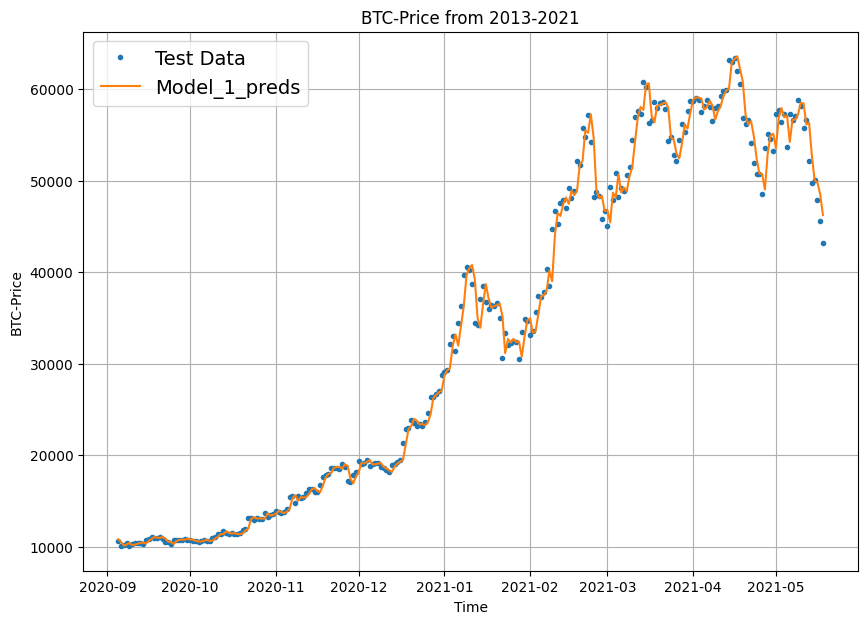

In [57]:
# Evaluate the result
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correcting plotting
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_1_preds, format="-", start=offset, label="Model_1_preds")

In [53]:
model_1_preds.shape

TensorShape([556])

# Model 2: Dense model (window = 30, horizon = 1)

In [58]:
HORIZON = 1
WINDOW_SIZE = 30

# Make windowed data with appropriate horizons and windows
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE,horizon=HORIZON)

In [59]:
full_windows[:10]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [60]:
full_labels[:10]

array([[196.02499],
       [198.04883],
       [198.93233],
       [200.543  ],
       [210.3075 ],
       [225.02   ],
       [248.25333],
       [262.32666],
       [294.48699],
       [331.10325]])

In [61]:
len(full_windows), len(full_labels)

(2757, 2757)

In [63]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [64]:
# Create the model
tf.random.set_seed(42)
model_2 = tf.keras.models.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2_Dense")

# Compile the model
model_2.compile(
    loss='mae',
    optimizer='adam',
)

# Fit the model
history_model_2 = model_2.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_2.name)]
)

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_2_Dense\assets


In [65]:
# Evaluating the model
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 704us/step - loss: 632.1175


632.1174926757812

In [66]:
# Lod in the best performance model
model_2 = tf.keras.models.load_model("Time-Series model checkpoint/model_2_Dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 645us/step - loss: 619.5518


619.5518188476562

In [67]:
# Making some predictions with model 2
model_2_preds = make_predictions(model=model_2, input_data=test_windows)
model_2_preds[:10]

18/18 [==============================] - 0s 646us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8868.578 , 8956.065 , 8751.7705, 8475.74  , 8353.509 , 8337.479 ,
       8247.154 , 8165.28  , 8162.7915, 7674.963 ], dtype=float32)>

In [68]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_preds=model_2_preds)
model_2_results

{'mae': 619.5519,
 'mape': 2.7775173,
 'mase': 1.0829828,
 'mse': 1267779.6,
 'rmse': 1125.9572}

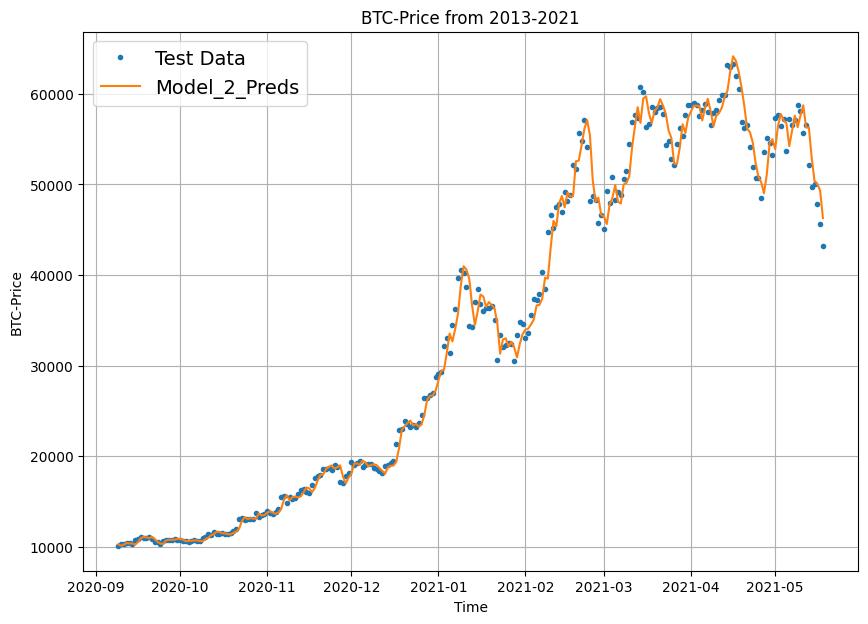

In [73]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_2_preds, format="-", start=offset, label="Model_2_Preds")

# Model 3: Dense model (window = 30, horizon = 7)

In [74]:
HORIZON = 7
WINDOW_SIZE = 30
tf.random.set_seed(42)
full_windows, full_labels = make_windows(x=prices, window_size=30, horizon=7)
len(full_windows), len(full_labels)

(2751, 2751)

In [76]:
full_windows[:2]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499]])

In [77]:
full_labels[:2]

array([[196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
        248.25333],
       [198.04883, 198.93233, 200.543  , 210.3075 , 225.02   , 248.25333,
        262.32666]])

In [79]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [80]:
# Create the model
tf.random.set_seed(42)
model_3 = tf.keras.models.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_3_dense')

# compile the model
model_3.compile(
    loss='mae',
    optimizer='adam'
)

# Fit the model
history_model_3 = model_3.fit(
    x=train_windows,
    y=train_labels,
    batch_size=128,
    epochs=100,
    verbose=2,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_3.name)]
)

Epoch 1/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 1s - loss: 1842.0111 - val_loss: 2857.4771 - 987ms/epoch - 55ms/step
Epoch 2/100
18/18 - 0s - loss: 568.7516 - val_loss: 2994.3120 - 31ms/epoch - 2ms/step
Epoch 3/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 464.8651 - val_loss: 2514.8435 - 317ms/epoch - 18ms/step
Epoch 4/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 431.5703 - val_loss: 2148.0623 - 314ms/epoch - 17ms/step
Epoch 5/100
18/18 - 0s - loss: 396.5753 - val_loss: 2309.6565 - 32ms/epoch - 2ms/step
Epoch 6/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 371.7326 - val_loss: 1967.6694 - 315ms/epoch - 18ms/step
Epoch 7/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 342.3391 - val_loss: 1690.6581 - 313ms/epoch - 17ms/step
Epoch 8/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 326.8973 - val_loss: 1661.6255 - 320ms/epoch - 18ms/step
Epoch 9/100
18/18 - 0s - loss: 313.0239 - val_loss: 1894.9133 - 31ms/epoch - 2ms/step
Epoch 10/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 316.0603 - val_loss: 1654.5236 - 320ms/epoch - 18ms/step
Epoch 11/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 301.9850 - val_loss: 1599.0265 - 313ms/epoch - 17ms/step
Epoch 12/100
18/18 - 0s - loss: 287.6011 - val_loss: 1615.8177 - 33ms/epoch - 2ms/step
Epoch 13/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 281.8259 - val_loss: 1497.0045 - 315ms/epoch - 18ms/step
Epoch 14/100
18/18 - 0s - loss: 278.5693 - val_loss: 1504.6768 - 32ms/epoch - 2ms/step
Epoch 15/100
18/18 - 0s - loss: 279.8480 - val_loss: 1685.5691 - 31ms/epoch - 2ms/step
Epoch 16/100
18/18 - 0s - loss: 272.2325 - val_loss: 1522.1576 - 30ms/epoch - 2ms/step
Epoch 17/100
18/18 - 0s - loss: 266.2125 - val_loss: 1636.7211 - 33ms/epoch - 2ms/step
Epoch 18/100
18/18 - 0s - loss: 267.9603 - val_loss: 1636.0170 - 31ms/epoch - 2ms/step
Epoch 19/100
18/18 - 0s - loss: 263.6173 - val_loss: 1740.3163 - 31ms/epoch - 2ms/step
Epoch 20/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 270.9123 - val_loss: 1480.6038 - 319ms/epoch - 18ms/step
Epoch 21/100
18/18 - 0s - loss: 259.5230 - val_loss: 1538.6099 - 32ms/epoch - 2ms/step
Epoch 22/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 259.0605 - val_loss: 1424.2039 - 319ms/epoch - 18ms/step
Epoch 23/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 256.3237 - val_loss: 1397.7638 - 312ms/epoch - 17ms/step
Epoch 24/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 273.7503 - val_loss: 1378.4347 - 312ms/epoch - 17ms/step
Epoch 25/100
18/18 - 0s - loss: 257.5005 - val_loss: 1559.6901 - 31ms/epoch - 2ms/step
Epoch 26/100
18/18 - 0s - loss: 257.8416 - val_loss: 1423.8717 - 30ms/epoch - 2ms/step
Epoch 27/100
18/18 - 0s - loss: 251.3848 - val_loss: 1398.0211 - 31ms/epoch - 2ms/step
Epoch 28/100
18/18 - 0s - loss: 249.7291 - val_loss: 1404.3861 - 32ms/epoch - 2ms/step
Epoch 29/100
18/18 - 0s - loss: 252.2711 - val_loss: 1512.6082 - 31ms/epoch - 2ms/step
Epoch 30/100
18/18 - 0s - loss: 247.0142 - val_loss: 1383.3868 - 30ms/epoch - 2ms/step
Epoch 31/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 245.8323 - val_loss: 1362.4641 - 318ms/epoch - 18ms/step
Epoch 32/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 248.1098 - val_loss: 1349.4746 - 315ms/epoch - 18ms/step
Epoch 33/100
18/18 - 0s - loss: 247.1959 - val_loss: 1350.6271 - 32ms/epoch - 2ms/step
Epoch 34/100
18/18 - 0s - loss: 249.4036 - val_loss: 1398.8179 - 31ms/epoch - 2ms/step
Epoch 35/100
18/18 - 0s - loss: 247.0011 - val_loss: 1382.9506 - 31ms/epoch - 2ms/step
Epoch 36/100
18/18 - 0s - loss: 245.7129 - val_loss: 1364.0817 - 33ms/epoch - 2ms/step
Epoch 37/100
18/18 - 0s - loss: 259.0397 - val_loss: 1388.5503 - 30ms/epoch - 2ms/step
Epoch 38/100
18/18 - 0s - loss: 246.0597 - val_loss: 1386.2500 - 31ms/epoch - 2ms/step
Epoch 39/100
18/18 - 0s - loss: 248.8863 - val_loss: 1462.7133 - 30ms/epoch - 2ms/step
Epoch 40/100
18/18 - 0s - loss: 246.4053 - val_loss: 1469.0267 - 34ms/epoch - 2ms/step
Epoch 41/100
18/18 - 0s - loss: 244.0314 - val_loss: 1527.8796 - 31ms/epoch - 2ms/step
Epoch 42/100
18/18 - 0s - loss: 248.5071 - val_loss: 1389.2019 - 31ms/epoch - 2ms/step
Epoch 43/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 239.1032 - val_loss: 1337.4474 - 318ms/epoch - 18ms/step
Epoch 44/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 243.5554 - val_loss: 1322.0153 - 321ms/epoch - 18ms/step
Epoch 45/100
18/18 - 0s - loss: 239.8437 - val_loss: 1433.6577 - 32ms/epoch - 2ms/step
Epoch 46/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 239.8124 - val_loss: 1311.6904 - 323ms/epoch - 18ms/step
Epoch 47/100
18/18 - 0s - loss: 238.6239 - val_loss: 1321.6499 - 32ms/epoch - 2ms/step
Epoch 48/100
18/18 - 0s - loss: 237.0900 - val_loss: 1331.7815 - 31ms/epoch - 2ms/step
Epoch 49/100
18/18 - 0s - loss: 240.5248 - val_loss: 1381.1815 - 30ms/epoch - 2ms/step
Epoch 50/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 239.3376 - val_loss: 1310.1622 - 320ms/epoch - 18ms/step
Epoch 51/100
18/18 - 0s - loss: 235.8960 - val_loss: 1433.7510 - 32ms/epoch - 2ms/step
Epoch 52/100
18/18 - 0s - loss: 237.9606 - val_loss: 1349.2172 - 31ms/epoch - 2ms/step
Epoch 53/100
18/18 - 0s - loss: 237.4707 - val_loss: 1326.1268 - 32ms/epoch - 2ms/step
Epoch 54/100
18/18 - 0s - loss: 244.5028 - val_loss: 1318.8887 - 32ms/epoch - 2ms/step
Epoch 55/100
18/18 - 0s - loss: 239.6794 - val_loss: 1348.4479 - 33ms/epoch - 2ms/step
Epoch 56/100
18/18 - 0s - loss: 234.9496 - val_loss: 1312.3579 - 32ms/epoch - 2ms/step
Epoch 57/100
18/18 - 0s - loss: 233.7048 - val_loss: 1404.8638 - 32ms/epoch - 2ms/step
Epoch 58/100
18/18 - 0s - loss: 233.2477 - val_loss: 1314.2625 - 31ms/epoch - 2ms/step
Epoch 59/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 233.6751 - val_loss: 1280.6073 - 318ms/epoch - 18ms/step
Epoch 60/100
18/18 - 0s - loss: 233.4967 - val_loss: 1290.8257 - 31ms/epoch - 2ms/step
Epoch 61/100
18/18 - 0s - loss: 231.6494 - val_loss: 1394.5133 - 31ms/epoch - 2ms/step
Epoch 62/100
18/18 - 0s - loss: 233.1429 - val_loss: 1282.7041 - 30ms/epoch - 2ms/step
Epoch 63/100
18/18 - 0s - loss: 233.6250 - val_loss: 1343.8779 - 30ms/epoch - 2ms/step
Epoch 64/100
18/18 - 0s - loss: 230.0999 - val_loss: 1286.5043 - 33ms/epoch - 2ms/step
Epoch 65/100
18/18 - 0s - loss: 232.5231 - val_loss: 1375.7401 - 33ms/epoch - 2ms/step
Epoch 66/100
18/18 - 0s - loss: 235.5948 - val_loss: 1560.2936 - 31ms/epoch - 2ms/step
Epoch 67/100
18/18 - 0s - loss: 240.6302 - val_loss: 1335.3845 - 32ms/epoch - 2ms/step
Epoch 68/100
18/18 - 0s - loss: 239.1062 - val_loss: 1288.7062 - 30ms/epoch - 2ms/step
Epoch 69/100
18/18 - 0s - loss: 231.2388 - val_loss: 1647.6459 - 31ms/epoch - 2ms/step
Epoch 70/100
18/18 - 0s - loss: 239.5432 - val_loss: 1

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 233.6144 - val_loss: 1277.0944 - 323ms/epoch - 18ms/step
Epoch 73/100
18/18 - 0s - loss: 228.7755 - val_loss: 1278.3021 - 32ms/epoch - 2ms/step
Epoch 74/100
18/18 - 0s - loss: 227.1538 - val_loss: 1369.8306 - 31ms/epoch - 2ms/step
Epoch 75/100
18/18 - 0s - loss: 229.1243 - val_loss: 1485.9199 - 31ms/epoch - 2ms/step
Epoch 76/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 230.7705 - val_loss: 1269.0737 - 316ms/epoch - 18ms/step
Epoch 77/100
18/18 - 0s - loss: 229.5901 - val_loss: 1277.4769 - 31ms/epoch - 2ms/step
Epoch 78/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 1s - loss: 229.0726 - val_loss: 1266.3391 - 506ms/epoch - 28ms/step
Epoch 79/100
18/18 - 0s - loss: 232.7141 - val_loss: 1348.2202 - 31ms/epoch - 2ms/step
Epoch 80/100
18/18 - 0s - loss: 231.5640 - val_loss: 1323.7007 - 30ms/epoch - 2ms/step
Epoch 81/100
18/18 - 0s - loss: 227.8292 - val_loss: 1274.0601 - 32ms/epoch - 2ms/step
Epoch 82/100
18/18 - 0s - loss: 225.2696 - val_loss: 1303.1139 - 32ms/epoch - 2ms/step
Epoch 83/100
18/18 - 0s - loss: 226.2260 - val_loss: 1349.0674 - 32ms/epoch - 2ms/step
Epoch 84/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 224.7762 - val_loss: 1258.4127 - 321ms/epoch - 18ms/step
Epoch 85/100
18/18 - 0s - loss: 225.1621 - val_loss: 1288.2784 - 33ms/epoch - 2ms/step
Epoch 86/100
18/18 - 0s - loss: 225.2385 - val_loss: 1329.0448 - 31ms/epoch - 2ms/step
Epoch 87/100
18/18 - 0s - loss: 233.7667 - val_loss: 1300.8718 - 32ms/epoch - 2ms/step
Epoch 88/100
18/18 - 0s - loss: 229.6924 - val_loss: 1639.4148 - 32ms/epoch - 2ms/step
Epoch 89/100
18/18 - 0s - loss: 242.7277 - val_loss: 1458.7533 - 32ms/epoch - 2ms/step
Epoch 90/100
18/18 - 0s - loss: 236.5474 - val_loss: 1383.6021 - 32ms/epoch - 2ms/step
Epoch 91/100
18/18 - 0s - loss: 237.4583 - val_loss: 1316.9215 - 31ms/epoch - 2ms/step
Epoch 92/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 223.6161 - val_loss: 1252.2214 - 321ms/epoch - 18ms/step
Epoch 93/100
18/18 - 0s - loss: 227.5325 - val_loss: 1293.8157 - 31ms/epoch - 2ms/step
Epoch 94/100
18/18 - 0s - loss: 226.7150 - val_loss: 1387.2362 - 31ms/epoch - 2ms/step
Epoch 95/100
18/18 - 0s - loss: 226.9143 - val_loss: 1270.0653 - 32ms/epoch - 2ms/step
Epoch 96/100
18/18 - 0s - loss: 224.9069 - val_loss: 1366.4824 - 32ms/epoch - 2ms/step
Epoch 97/100
18/18 - 0s - loss: 235.5679 - val_loss: 1392.8850 - 31ms/epoch - 2ms/step
Epoch 98/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 227.5154 - val_loss: 1245.6576 - 315ms/epoch - 17ms/step
Epoch 99/100


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_3_dense\assets


18/18 - 0s - loss: 222.1698 - val_loss: 1241.7041 - 315ms/epoch - 17ms/step
Epoch 100/100
18/18 - 0s - loss: 224.2441 - val_loss: 1513.7236 - 32ms/epoch - 2ms/step


In [81]:
# Evaluate model_3 with the test dataset
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 645us/step - loss: 1513.7236


1513.7236328125

In [82]:
# Load in the best performance of model_3
model_3 = tf.keras.models.load_model("Time-Series model checkpoint/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 645us/step - loss: 1241.7041


1241.7041015625

In [83]:
# Making predictions with model 3
model_3_preds = make_predictions(model=model_3, input_data=test_windows)
model_3_preds[:10]

18/18 [==============================] - 0s 645us/step


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[9501.452, 9354.355, 9422.295, 9577.424, 9494.1  , 9444.241,
        9464.905],
       [9027.85 , 8991.423, 9108.29 , 9170.915, 9088.501, 9120.863,
        9122.397],
       [8849.875, 8920.882, 8981.253, 9165.386, 9136.888, 8994.276,
        9233.566],
       [8938.874, 8962.493, 9027.244, 9215.07 , 9159.007, 9061.496,
        9274.131],
       [9008.742, 8969.753, 9021.084, 9094.796, 8963.132, 8881.874,
        9057.856],
       [8840.042, 8917.984, 8953.988, 9088.442, 8888.227, 8749.307,
        8922.395],
       [8959.714, 8776.313, 8942.782, 9035.678, 8798.137, 8798.673,
        8706.313],
       [8845.493, 8633.877, 8769.46 , 8795.529, 8654.871, 8688.771,
        8469.968],
       [8750.443, 8430.593, 8452.594, 8493.437, 8441.492, 8484.519,
        8372.759],
       [8618.87 , 8341.236, 8423.85 , 8446.414, 8342.212, 8524.697,
        8487.566]], dtype=float32)>

In [90]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_preds=tf.squeeze(model_3_preds))
model_3_results

{'mae': array([  672.3239  ,   364.42523 ,   402.10574 ,   464.59332 ,
          445.25754 ,   446.05057 ,   493.46527 ,   476.97803 ,
          479.81998 ,   581.44434 ,   906.7889  ,   876.2409  ,
          887.6002  ,   792.79504 ,   512.0677  ,   214.38734 ,
          158.08789 ,   224.29736 ,   229.3042  ,   225.31766 ,
          192.43596 ,   215.20006 ,   404.81104 ,   395.72495 ,
          188.5427  ,   231.87709 ,   128.72502 ,    69.57792 ,
          160.1884  ,   215.08363 ,   276.28836 ,   447.91238 ,
          370.39523 ,   435.30698 ,   288.44174 ,   375.0396  ,
          327.77386 ,   207.8342  ,   239.49658 ,   242.58238 ,
          433.0275  ,    65.42864 ,    97.310196,    47.336914,
          131.65785 ,    91.43122 ,    88.174034,    94.846054,
           58.253765,   135.33838 ,   114.9225  ,   129.91594 ,
          192.67404 ,   192.57812 ,   249.76025 ,   392.78857 ,
          500.82492 ,   490.64926 ,   497.4873  ,   567.4631  ,
          369.35498 ,   186.13916

In [92]:
model_3_preds.shape, test_labels.shape

(TensorShape([551, 7]), (551, 7))

In [93]:
model_3_preds[:2]

<tf.Tensor: shape=(2, 7), dtype=float32, numpy=
array([[9501.452, 9354.355, 9422.295, 9577.424, 9494.1  , 9444.241,
        9464.905],
       [9027.85 , 8991.423, 9108.29 , 9170.915, 9088.501, 9120.863,
        9122.397]], dtype=float32)>

In [94]:
test_labels[:2]

array([[8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
        8760.89271814, 8749.52059102, 8656.97092235],
       [8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
        8749.52059102, 8656.97092235, 8500.64355816]])

In [95]:
# Because the difference in dimensions we have to update the function
def evaluate_preds(y_true, y_preds):
    # Make sure float32 datatype (for metrics calculation)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_preds = tf.cast(y_preds, dtype=tf.float32)

    # Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_preds)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_preds)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_preds)
    mase = mean_absolute_scaled_error(y_true, y_preds)

    # Account for different sized metric (for longer horizon, we want to reduce metrics to a single value)
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "mae":mae.numpy(),
        "mse":mse.numpy(),
        "rmse":rmse.numpy(),
        "mape":mape.numpy(),
        "mase":mase.numpy()
    }

In [96]:
model_3_results = evaluate_preds(test_labels, model_3_preds)
model_3_results

{'mae': 1241.704,
 'mse': 5296518.0,
 'rmse': 1418.0558,
 'mape': 5.600132,
 'mase': 2.2095423}

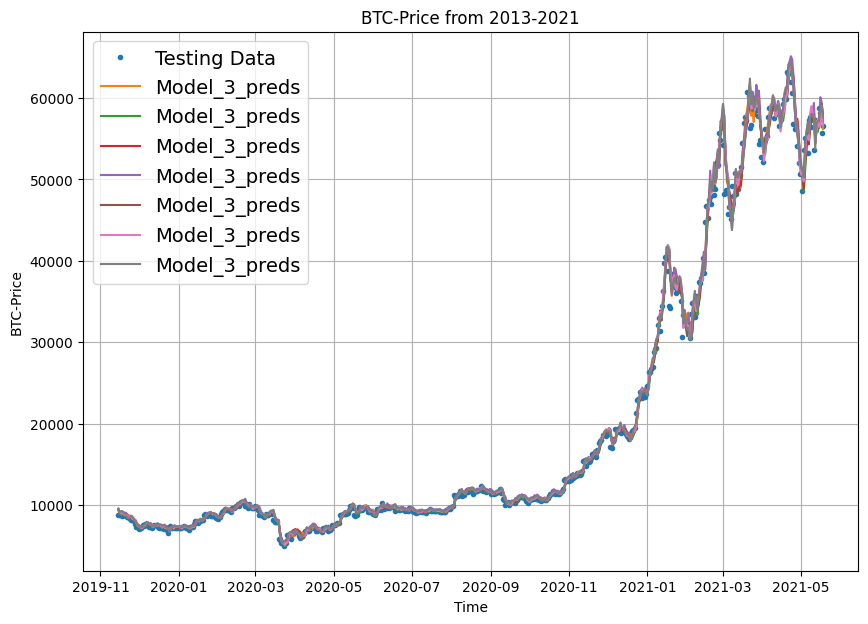

In [109]:
# Evaluate the result of model 3
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], label="Testing Data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_3_preds, format='-', label="Model_3_preds")

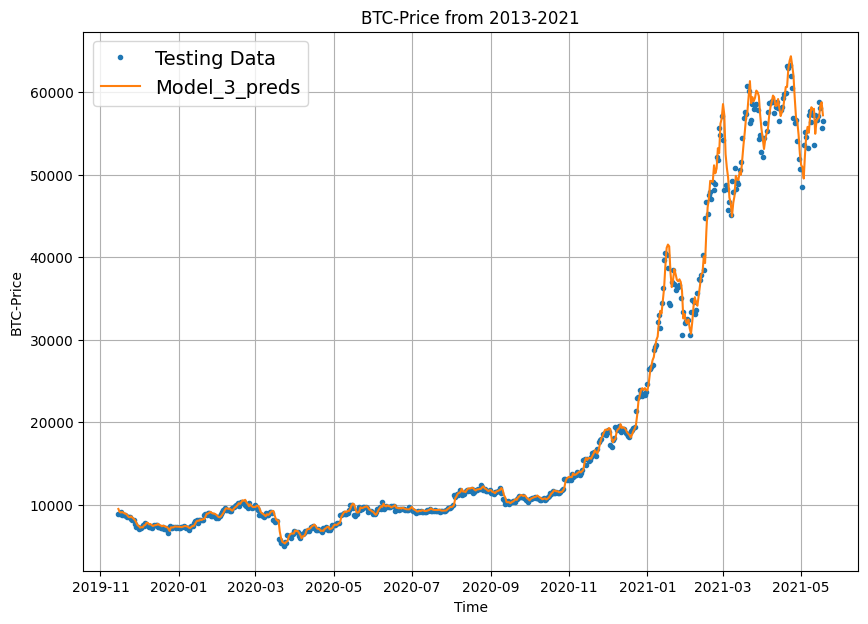

In [110]:
# Evaluate the result of model 3
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], label="Testing Data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format='-', label="Model_3_preds")

# comparing ou modelling experiments so far

In [111]:
pd.DataFrame({
    "naive":naive_results,
    "model_1": model_1_results,
    "model_2": model_2_results,
    "model_3": model_3_results
})

,naive,model_1,model_2,model_3
mae,5.679802e+02,5.645117e+02,6.195519e+02,1.241704e+03
mape,2.516525e+00,2.527275e+00,2.777517e+00,5.600132e+00
mase,9.995700e-01,9.916908e-01,1.082983e+00,2.209542e+00
mse,1.147547e+06,1.163236e+06,1.267780e+06,5.296518e+06
rmse,1.071236e+03,1.078534e+03,1.125957e+03,1.418056e+03


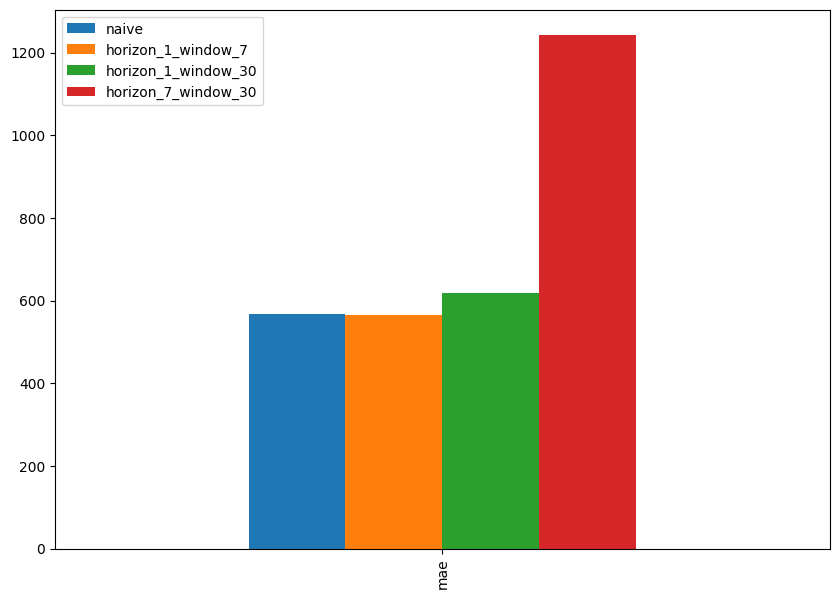

In [112]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

# Model 4: Using (conv1D)

In [114]:
HORIZON = 1
WINDOW_SIZE = 7
full_windows, full_labels = make_windows(x=prices, window_size=7, horizon=1)
len(full_windows), len(full_labels)

(2780, 2780)

In [116]:
# Create the train/test split
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows),  len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [117]:
tf.random.set_seed(42)
# Create Conv1D model
model_4 = tf.keras.models.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation='relu'),
    layers.Dense(HORIZON)
], name='Model_4_Conv1D')

# Compile the model
model_4.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer='adam',
)

# Fit the model
history_model_4 = model_4.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    verbose=1,
    callbacks=[create_model_checkpoint(model_name=model_4.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 7s - loss: 3991.6677

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 1s 35ms/step - loss: 2308.3154 - val_loss: 5634.8521
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 661.7498

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 377.4768 - val_loss: 1223.5135
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 163.4076

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 28ms/step - loss: 212.3814 - val_loss: 1099.9055
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 267.7081

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 199.3115 - val_loss: 1069.5342
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 201.5745

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 1s 41ms/step - loss: 191.1433 - val_loss: 1059.1769
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 192.3763 - val_loss: 1064.1128
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 240.2231

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 27ms/step - loss: 191.7565 - val_loss: 1033.1910
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 170.9260

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 27ms/step - loss: 183.8898 - val_loss: 1026.4227
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 181.6329 - val_loss: 1043.0221
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 199.2457

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 178.9975 - val_loss: 1005.6143
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 201.2233

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 28ms/step - loss: 176.6768 - val_loss: 976.8078
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 174.8539 - val_loss: 1019.0475
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 134.8786

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 27ms/step - loss: 171.3850 - val_loss: 974.5326
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 195.6693

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 167.6381 - val_loss: 960.0218
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 165.6949

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 166.1687 - val_loss: 942.7065
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 157.5498

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 161.7310 - val_loss: 910.0064
Epoch 17/100
18/18 [==============================] - 0s 2ms/step - loss: 159.2509 - val_loss: 940.7460
Epoch 18/100
18/18 [==============================] - 0s 2ms/step - loss: 157.2070 - val_loss: 923.6606
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 86.7514

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 27ms/step - loss: 154.0896 - val_loss: 878.1873
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 163.8322

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 27ms/step - loss: 151.2472 - val_loss: 842.4114
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 212.7987

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 149.2783 - val_loss: 819.4142
Epoch 22/100
18/18 [==============================] - 0s 2ms/step - loss: 145.8472 - val_loss: 825.2832
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 165.1246

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 142.6145 - val_loss: 807.1827
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 158.6979

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 141.9138 - val_loss: 803.9083
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 148.9200

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 138.2112 - val_loss: 771.9005
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 137.9586

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 1s 39ms/step - loss: 136.1994 - val_loss: 744.4185
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 198.2781

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 134.7213 - val_loss: 734.9733
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 137.3064

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 131.7341 - val_loss: 720.9218
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 128.2662

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 130.4871 - val_loss: 715.9746
Epoch 30/100
18/18 [==============================] - 0s 2ms/step - loss: 131.9475 - val_loss: 806.3752
Epoch 31/100
18/18 [==============================] - 0s 2ms/step - loss: 139.8376 - val_loss: 832.2194
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 133.6014

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 135.1439 - val_loss: 697.4456
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 153.0557

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 128.4666 - val_loss: 686.9446
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 130.3073

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 123.8070 - val_loss: 677.5193
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 111.2363

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 122.5804 - val_loss: 667.9905
Epoch 36/100
18/18 [==============================] - 0s 2ms/step - loss: 125.0828 - val_loss: 701.8463
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 154.9639

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 123.9044 - val_loss: 653.8524
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 112.8991

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 121.1607 - val_loss: 651.1576
Epoch 39/100
18/18 [==============================] - 0s 2ms/step - loss: 121.0648 - val_loss: 680.3898
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 120.8993

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 119.1519 - val_loss: 646.5009
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 109.0105

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 119.1688 - val_loss: 637.3809
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 113.3891

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 121.5646 - val_loss: 635.6722
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 95.7863

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 116.8254 - val_loss: 628.5341
Epoch 44/100
18/18 [==============================] - 0s 2ms/step - loss: 116.7883 - val_loss: 635.0300
Epoch 45/100
18/18 [==============================] - 0s 2ms/step - loss: 119.1473 - val_loss: 632.1469
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 90.7568

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 27ms/step - loss: 116.7032 - val_loss: 623.4737
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 118.8708 - val_loss: 669.6403
Epoch 48/100
18/18 [==============================] - 0s 2ms/step - loss: 115.4928 - val_loss: 657.6899
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 169.4015

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 117.2216 - val_loss: 616.0348
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 135.9044

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 1s 40ms/step - loss: 114.7475 - val_loss: 610.2449
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 114.0030 - val_loss: 627.4238
Epoch 52/100
18/18 [==============================] - 0s 2ms/step - loss: 117.0110 - val_loss: 612.9542
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 64.7565

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 116.8806 - val_loss: 606.6745
Epoch 54/100
18/18 [==============================] - 0s 2ms/step - loss: 113.0125 - val_loss: 642.4804
Epoch 55/100
18/18 [==============================] - 0s 2ms/step - loss: 116.1836 - val_loss: 609.2096
Epoch 56/100
18/18 [==============================] - 0s 2ms/step - loss: 112.0697 - val_loss: 748.1620
Epoch 57/100
18/18 [==============================] - 0s 2ms/step - loss: 129.2485 - val_loss: 707.5994
Epoch 58/100
18/18 [==============================] - 0s 2ms/step - loss: 123.0929 - val_loss: 663.5309
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 81.2690

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 111.7346 - val_loss: 605.1815
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 112.3173 - val_loss: 618.5287
Epoch 61/100
18/18 [==============================] - 0s 2ms/step - loss: 111.2851 - val_loss: 609.6194
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 79.1217

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 110.6326 - val_loss: 595.8882
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 111.8289 - val_loss: 619.7044
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 112.6235 - val_loss: 632.2761
Epoch 65/100
18/18 [==============================] - 0s 2ms/step - loss: 112.7928 - val_loss: 603.9490
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 118.6405

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 111.8017 - val_loss: 589.7640
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 110.2582 - val_loss: 694.9435
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 115.3358 - val_loss: 684.2908
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 123.8819 - val_loss: 668.8428
Epoch 70/100
18/18 [==============================] - 0s 2ms/step - loss: 122.8225 - val_loss: 609.1459
Epoch 71/100
18/18 [==============================] - 0s 2ms/step - loss: 110.8661 - val_loss: 612.7147
Epoch 72/100
18/18 [==============================] - 0s 2ms/step - loss: 113.1016 - val_loss: 615.1451
Epoch 73/100
18/18 [==============================] - 0s 2ms/step - loss: 110.6713 - val_loss: 598.2809
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 164.6910

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 111.1422 - val_loss: 583.1348
Epoch 75/100
18/18 [==============================] - 0s 2ms/step - loss: 109.8595 - val_loss: 592.6588
Epoch 76/100
18/18 [==============================] - 0s 2ms/step - loss: 110.5726 - val_loss: 597.7385
Epoch 77/100
18/18 [==============================] - 0s 2ms/step - loss: 109.5493 - val_loss: 585.1957
Epoch 78/100
18/18 [==============================] - 0s 2ms/step - loss: 111.1829 - val_loss: 589.2977
Epoch 79/100
18/18 [==============================] - 0s 2ms/step - loss: 109.4665 - val_loss: 605.2794
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 115.7184

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 27ms/step - loss: 109.8761 - val_loss: 582.0532
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 92.3543

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 108.7192 - val_loss: 581.3619
Epoch 82/100
18/18 [==============================] - 0s 2ms/step - loss: 113.3257 - val_loss: 583.4716
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 112.5728 - val_loss: 641.0562
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 112.3629 - val_loss: 585.3458
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 108.7021 - val_loss: 582.2460
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 107.6883 - val_loss: 608.7970
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 126.6351

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 110.0229 - val_loss: 576.3054
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 109.9723 - val_loss: 589.2826
Epoch 89/100
18/18 [==============================] - 0s 2ms/step - loss: 112.9784 - val_loss: 577.3007
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 108.7609 - val_loss: 660.4075
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 113.7528 - val_loss: 594.7026
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 109.5857 - val_loss: 578.5992
Epoch 93/100
18/18 [==============================] - 0s 2ms/step - loss: 113.1330 - val_loss: 643.3469
Epoch 94/100
18/18 [==============================] - 0s 2ms/step - loss: 110.4349 - val_loss: 579.0035
Epoch 95/100
18/18 [==============================] - 0s 2ms/step - loss: 108.0154 - val_loss: 582.2892
Epoch 96/100
18/18 [==============================] - 0s 2ms/step - loss: 11

INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\Model_4_Conv1D\assets


18/18 [==============================] - 0s 26ms/step - loss: 110.9427 - val_loss: 574.7826
Epoch 99/100
18/18 [==============================] - 0s 2ms/step - loss: 109.6149 - val_loss: 587.8900
Epoch 100/100
18/18 [==============================] - 0s 2ms/step - loss: 109.1878 - val_loss: 630.1912


In [118]:
model_4.summary()

Model: "Model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [119]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 645us/step - loss: 630.1912


630.191162109375

In [120]:
# load back the best performing conv1D and reevaluate
model_4 = tf.keras.models.load_model("Time-Series model checkpoint/Model_4_Conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 763us/step - loss: 574.7826


574.7825927734375

In [122]:
# Make predictions
model_4_preds = make_predictions(model=model_4, input_data=test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 647us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8888.285, 8788.804, 9004.29 , 8795.904, 8740.938, 8742.214,
       8666.682, 8534.032, 8466.352, 8511.923], dtype=float32)>

In [123]:
model_4_results = evaluate_preds(test_labels, model_4_preds)
model_4_results

{'mae': 17152.918,
 'mse': 615484800.0,
 'rmse': 23739.46,
 'mape': 113.40899,
 'mase': 30.132929}

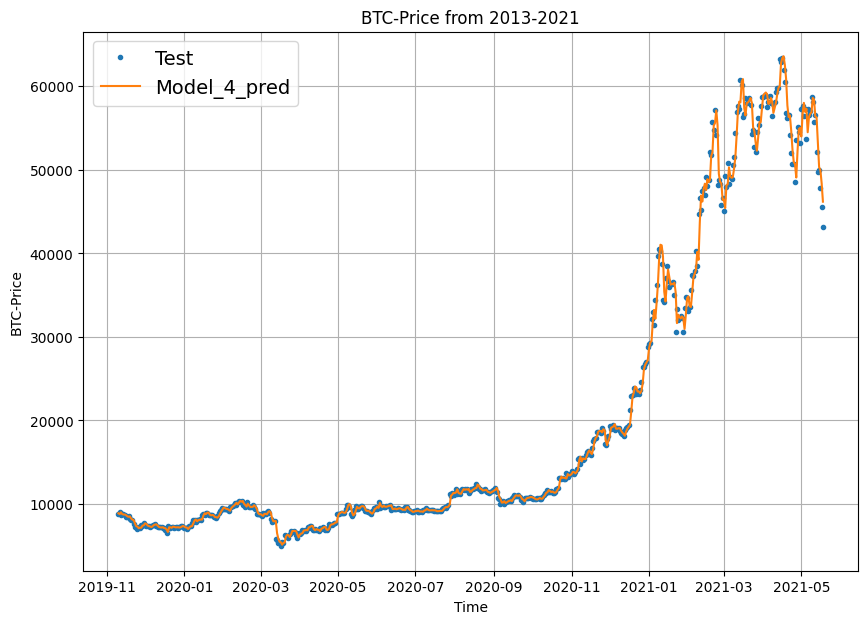

In [129]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], label="Test")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_4_preds, format='-', label="Model_4_pred")

# Model 5: LSTM RNN model

In [135]:
tf.random.set_seed(42)
# Let's build an LSTM model
inputs = layers.Input(shape=(WINDOW_SIZE), dtype=tf.float32, name='input_layer')
x = layers.Lambda(lambda x : tf.expand_dims(x, axis=1))(inputs)  # reshape the input
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
# x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='model_5_LSTM')

# Compile model
model_5.compile(
    loss='mae',
    optimizer='adam'
)

# Fit model
history_model_5 = model_5.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    verbose=1,
    callbacks=[create_model_checkpoint(model_name=model_5.name)]
)

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 307ms/step - loss: 2726.2454 - val_loss: 19365.5605
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 2772.2090

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 275ms/step - loss: 2726.0320 - val_loss: 19359.1992
Epoch 39/100
16/18 [=========================>....] - ETA: 0s - loss: 2724.1934

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 303ms/step - loss: 2725.8022 - val_loss: 19356.3652
Epoch 40/100
16/18 [=========================>....] - ETA: 0s - loss: 2727.8416

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 278ms/step - loss: 2725.6941 - val_loss: 19350.6016
Epoch 41/100
16/18 [=========================>....] - ETA: 0s - loss: 2753.0642

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 299ms/step - loss: 2725.5549 - val_loss: 19346.1406
Epoch 42/100
17/18 [===========================>..] - ETA: 0s - loss: 2741.9653

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 277ms/step - loss: 2725.4744 - val_loss: 19344.4531
Epoch 43/100
16/18 [=========================>....] - ETA: 0s - loss: 2737.7219

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 297ms/step - loss: 2725.3975 - val_loss: 19341.1621
Epoch 44/100
16/18 [=========================>....] - ETA: 0s - loss: 2710.5417

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 275ms/step - loss: 2725.3162 - val_loss: 19337.0781
Epoch 45/100
16/18 [=========================>....] - ETA: 0s - loss: 2709.6440

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 301ms/step - loss: 2725.2751 - val_loss: 19332.6895
Epoch 46/100
13/18 [====================>.........] - ETA: 0s - loss: 2756.8315

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 285ms/step - loss: 2725.2102 - val_loss: 19329.2656
Epoch 47/100
16/18 [=========================>....] - ETA: 0s - loss: 2706.1025

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 299ms/step - loss: 2725.1987 - val_loss: 19328.1484
Epoch 48/100
13/18 [====================>.........] - ETA: 0s - loss: 2659.3416

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 276ms/step - loss: 2725.1460 - val_loss: 19325.7891
Epoch 49/100
16/18 [=========================>....] - ETA: 0s - loss: 2676.9836

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 296ms/step - loss: 2725.1567 - val_loss: 19324.7598
Epoch 50/100
15/18 [========================>.....] - ETA: 0s - loss: 2721.4475

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 290ms/step - loss: 2725.1638 - val_loss: 19321.4824
Epoch 51/100
18/18 [==============================] - 0s 12ms/step - loss: 2725.1736 - val_loss: 19324.0000
Epoch 52/100
18/18 [==============================] - 0s 12ms/step - loss: 2725.1394 - val_loss: 19321.6426
Epoch 53/100
18/18 [==============================] - 0s 12ms/step - loss: 2725.1631 - val_loss: 19321.5469
Epoch 54/100
16/18 [=========================>....] - ETA: 0s - loss: 2705.5742

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 276ms/step - loss: 2725.1365 - val_loss: 19320.0273
Epoch 55/100
16/18 [=========================>....] - ETA: 0s - loss: 2727.2725

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 297ms/step - loss: 2725.1389 - val_loss: 19318.7168
Epoch 56/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1582 - val_loss: 19320.7832
Epoch 57/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1372 - val_loss: 19319.5820
Epoch 58/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1299 - val_loss: 19319.0859
Epoch 59/100
18/18 [==============================] - 0s 11ms/step - loss: 2725.1362 - val_loss: 19318.7227
Epoch 60/100
13/18 [====================>.........] - ETA: 0s - loss: 2794.6736

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 271ms/step - loss: 2725.1428 - val_loss: 19316.9785
Epoch 61/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1372 - val_loss: 19317.3613
Epoch 62/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1265 - val_loss: 19318.5332
Epoch 63/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1523 - val_loss: 19319.2129
Epoch 64/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1272 - val_loss: 19319.5215
Epoch 65/100
18/18 [==============================] - 0s 11ms/step - loss: 2725.1362 - val_loss: 19318.8555
Epoch 66/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1360 - val_loss: 19319.7832
Epoch 67/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1418 - val_loss: 19320.5020
Epoch 68/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1406 - val_loss: 19319.1641
Epoch 69/100
18/18 [====================

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 300ms/step - loss: 2725.1807 - val_loss: 19314.2715
Epoch 88/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1528 - val_loss: 19315.1992
Epoch 89/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1582 - val_loss: 19317.5898
Epoch 90/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1414 - val_loss: 19316.2227
Epoch 91/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1501 - val_loss: 19317.6836
Epoch 92/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1421 - val_loss: 19318.5977
Epoch 93/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1416 - val_loss: 19318.5703
Epoch 94/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1316 - val_loss: 19317.8242
Epoch 95/100
18/18 [==============================] - 0s 10ms/step - loss: 2725.1372 - val_loss: 19318.5449
Epoch 96/100
18/18 [====================

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 5s 273ms/step - loss: 2725.2012 - val_loss: 19309.9316
Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2758.8545 

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 2s 77ms/step - loss: 2727.9092 - val_loss: 14225.7324
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 1584.1307

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 1500.4844 - val_loss: 3000.0999
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 301.1362

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 2s 97ms/step - loss: 299.2850 - val_loss: 1144.7863
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 214.8603

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 213.4211 - val_loss: 1081.7666
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 199.2831 - val_loss: 1154.9982
Epoch 6/100
16/18 [=========================>....] - ETA: 0s - loss: 192.7162

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 70ms/step - loss: 193.5601 - val_loss: 1077.1014
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 191.8849 - val_loss: 1081.6423
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 189.8614 - val_loss: 1093.2303
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 188.0881 - val_loss: 1082.2039
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 183.5569

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 68ms/step - loss: 186.8751 - val_loss: 1059.4009
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 186.6636

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 68ms/step - loss: 186.4679 - val_loss: 1057.0590
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 184.7540

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 68ms/step - loss: 185.0917 - val_loss: 1049.0275
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 183.5968

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 182.8197 - val_loss: 1030.9874
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 181.1684 - val_loss: 1058.4166
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 180.6839 - val_loss: 1036.0283
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 180.0647

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 87ms/step - loss: 178.4126 - val_loss: 993.7063
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 176.9965 - val_loss: 1061.1278
Epoch 18/100
18/18 [==============================] - 0s 4ms/step - loss: 176.2757 - val_loss: 1036.7855
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 174.3176 - val_loss: 1040.7621
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 173.2421

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 173.8591 - val_loss: 967.2626
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 169.2425

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 70ms/step - loss: 170.3795 - val_loss: 965.1540
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 169.8681

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 169.0288 - val_loss: 950.7257
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 169.2138 - val_loss: 964.7604
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 165.6331 - val_loss: 967.7213
Epoch 25/100
16/18 [=========================>....] - ETA: 0s - loss: 167.8229

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 71ms/step - loss: 163.9491 - val_loss: 937.7222
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 162.0609

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 162.0609 - val_loss: 922.2242
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 160.9612 - val_loss: 923.6351
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 159.4330

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 83ms/step - loss: 159.6550 - val_loss: 891.3737
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 157.5194 - val_loss: 897.0580
Epoch 30/100
15/18 [========================>.....] - ETA: 0s - loss: 154.2978

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 156.8842 - val_loss: 889.6399
Epoch 31/100
18/18 [==============================] - ETA: 0s - loss: 154.3728

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 68ms/step - loss: 154.3728 - val_loss: 870.5778
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 153.0383

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 153.0383 - val_loss: 866.5974
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 152.0762 - val_loss: 916.8549
Epoch 34/100
16/18 [=========================>....] - ETA: 0s - loss: 150.9719

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 77ms/step - loss: 151.5204 - val_loss: 828.3688
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 148.2543 - val_loss: 849.3349
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 148.3425

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 70ms/step - loss: 149.1111 - val_loss: 809.9461
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 146.4938 - val_loss: 816.2372
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 146.1906

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 143.6684 - val_loss: 798.8015
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 143.5103

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 87ms/step - loss: 143.5103 - val_loss: 788.3299
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 143.7489 - val_loss: 798.7368
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 141.0227

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 140.0289 - val_loss: 775.6080
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 139.4933 - val_loss: 780.2319
Epoch 43/100
17/18 [===========================>..] - ETA: 0s - loss: 137.4692

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 75ms/step - loss: 137.6664 - val_loss: 773.4052
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 78.9356

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 67ms/step - loss: 136.0979 - val_loss: 754.1948
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 96.8407

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 70ms/step - loss: 134.9957 - val_loss: 748.9467
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 134.2961 - val_loss: 770.0118
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 133.9018 - val_loss: 749.2525
Epoch 48/100
17/18 [===========================>..] - ETA: 0s - loss: 132.2768

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 70ms/step - loss: 132.2234 - val_loss: 744.8912
Epoch 49/100
16/18 [=========================>....] - ETA: 0s - loss: 130.4318

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 72ms/step - loss: 131.3097 - val_loss: 737.6327
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 133.5020 - val_loss: 745.6847
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 133.8106 - val_loss: 825.9675
Epoch 52/100
17/18 [===========================>..] - ETA: 0s - loss: 140.5320

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 140.4458 - val_loss: 711.2404
Epoch 53/100
18/18 [==============================] - ETA: 0s - loss: 131.6459

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 70ms/step - loss: 131.6459 - val_loss: 709.8078
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 128.7773 - val_loss: 712.0375
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 142.3349

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 70ms/step - loss: 126.6746 - val_loss: 705.3954
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 124.9182

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 127.7785 - val_loss: 695.7678
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 127.0216 - val_loss: 710.1337
Epoch 58/100
18/18 [==============================] - ETA: 0s - loss: 124.2972

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 124.2972 - val_loss: 681.7440
Epoch 59/100
18/18 [==============================] - ETA: 0s - loss: 122.8151

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 70ms/step - loss: 122.8151 - val_loss: 681.6396
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 122.6669 - val_loss: 682.6488
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 123.1076 - val_loss: 715.4470
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 125.4213 - val_loss: 733.8192
Epoch 63/100
18/18 [==============================] - ETA: 0s - loss: 126.7271

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 68ms/step - loss: 126.7271 - val_loss: 677.3206
Epoch 64/100
18/18 [==============================] - ETA: 0s - loss: 120.9523

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 87ms/step - loss: 120.9523 - val_loss: 662.6064
Epoch 65/100
18/18 [==============================] - ETA: 0s - loss: 120.4421

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 71ms/step - loss: 120.4421 - val_loss: 655.5276
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 120.2100 - val_loss: 669.0597
Epoch 67/100
18/18 [==============================] - ETA: 0s - loss: 120.7875

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 120.7875 - val_loss: 652.5116
Epoch 68/100
18/18 [==============================] - ETA: 0s - loss: 119.9583

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 68ms/step - loss: 119.9583 - val_loss: 646.7784
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 123.0242 - val_loss: 659.7325
Epoch 70/100
17/18 [===========================>..] - ETA: 0s - loss: 118.2078

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 119.7176 - val_loss: 641.8590
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 118.7746 - val_loss: 680.9047
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 121.5414 - val_loss: 648.4583
Epoch 73/100
18/18 [==============================] - ETA: 0s - loss: 118.5667

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 118.5667 - val_loss: 635.5500
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 118.1319 - val_loss: 659.6842
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 117.9920 - val_loss: 647.0842
Epoch 76/100
17/18 [===========================>..] - ETA: 0s - loss: 116.7007

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 116.8519 - val_loss: 631.0496
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 117.3524 - val_loss: 689.4941
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 119.8055 - val_loss: 645.6613
Epoch 79/100
17/18 [===========================>..] - ETA: 0s - loss: 116.8692

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 116.3186 - val_loss: 624.1722
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 115.6468 - val_loss: 642.8595
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 116.5924 - val_loss: 648.8688
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 118.5533 - val_loss: 627.0568
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 115.8994 - val_loss: 665.1351
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 117.2957 - val_loss: 629.2273
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9490 - val_loss: 649.6006
Epoch 86/100
17/18 [===========================>..] - ETA: 0s - loss: 116.7363

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 87ms/step - loss: 118.0076 - val_loss: 621.6082
Epoch 87/100
18/18 [==============================] - ETA: 0s - loss: 115.2300

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 68ms/step - loss: 115.2300 - val_loss: 614.0470
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 114.3331 - val_loss: 618.8574
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 113.4603 - val_loss: 643.4673
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 119.3928 - val_loss: 641.3552
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 118.1821 - val_loss: 669.1158
Epoch 92/100
17/18 [===========================>..] - ETA: 0s - loss: 114.9313

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 68ms/step - loss: 114.8476 - val_loss: 607.9638
Epoch 93/100
 1/18 [>.............................] - ETA: 0s - loss: 113.1003

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 68ms/step - loss: 114.9266 - val_loss: 607.3412
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 112.7021 - val_loss: 614.6503
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 112.9846 - val_loss: 615.2175
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 114.1045 - val_loss: 621.4265
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 116.3425 - val_loss: 653.3630
Epoch 98/100
17/18 [===========================>..] - ETA: 0s - loss: 115.8790

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_5_LSTM\assets


18/18 [==============================] - 1s 68ms/step - loss: 115.0866 - val_loss: 602.5643
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 112.7023 - val_loss: 608.3318
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 115.9052 - val_loss: 605.6050


In [136]:
# Let's evaluate the model 5
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 880us/step - loss: 605.6050


605.6050415039062

In [137]:
# Load in the best performance for the model 5
model_5 = tf.keras.models.load_model("Time-Series model checkpoint/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 880us/step - loss: 602.5643


602.5642700195312

In [138]:
# Make predictions using model 5 to evaluate
model_5_preds = make_predictions(model=model_5, input_data=test_windows)

18/18 [==============================] - 0s 821us/step


In [139]:
model_5_results = evaluate_preds(y_true=test_labels, y_preds=model_5_preds)
model_5_results

{'mae': 17161.17,
 'mse': 616127800.0,
 'rmse': 23757.133,
 'mape': 113.52218,
 'mase': 30.147427}

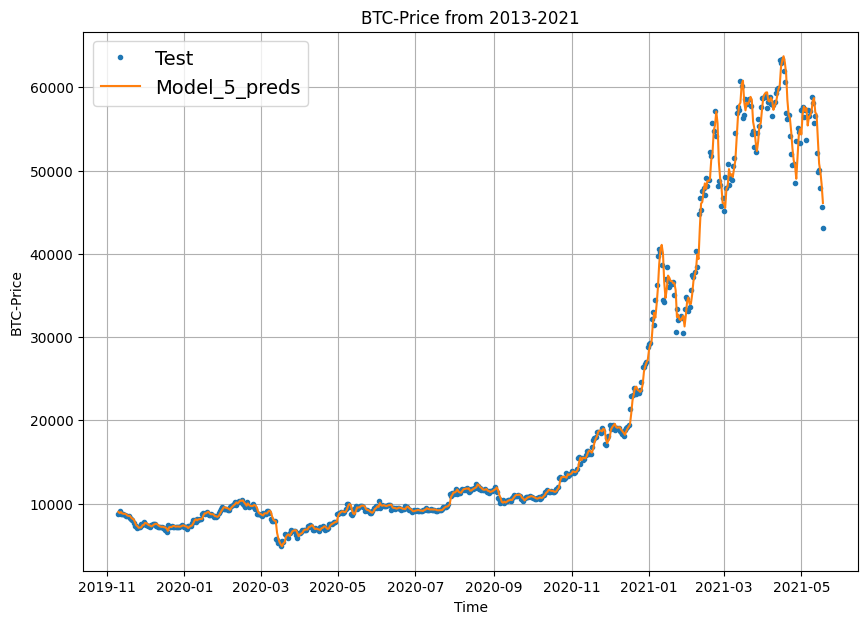

In [141]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], label="Test")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_5_preds, format='-', label="Model_5_preds")

# Multivariate time series data

In [142]:
# let's add the bicoin halving events to our dataset
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [147]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_pirces.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_pirces.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [148]:
# Add block_reward column
bitcoin_prices_block = bitcoin_pirces.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


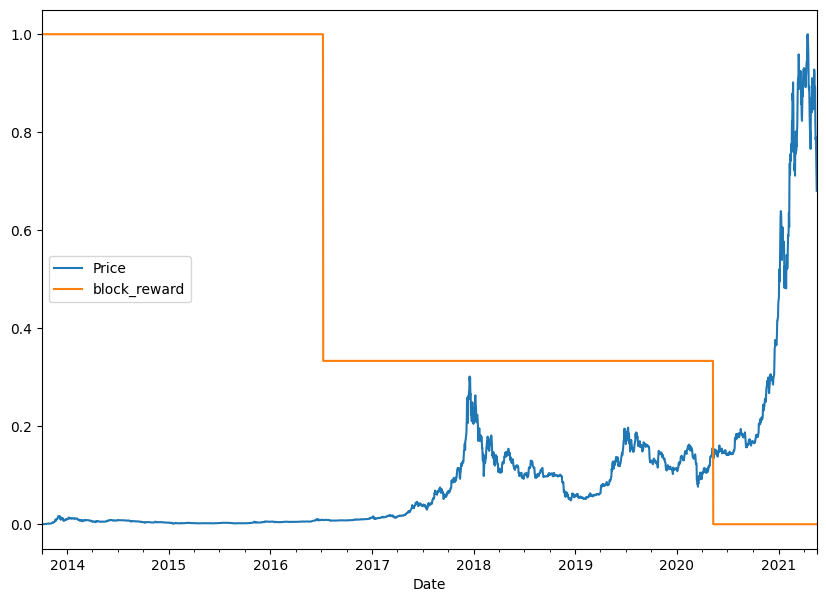

In [149]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [150]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [151]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [152]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

# Model 6: Multivariate time series model

In [153]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: Time-Series model checkpoint\model_6_dense_multivariate\assets


In [156]:

# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("Time-Series model checkpoint/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 704us/step - loss: 568.5865


568.5865478515625

In [157]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 645us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8885.591, 8787.239, 9042.472, 8826.937, 8749.067, 8753.772,
       8701.948, 8539.481, 8478.494, 8539.377], dtype=float32)>

In [159]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_preds=model_6_preds)
model_6_results

{'mae': 568.5867,
 'mse': 1177862.9,
 'rmse': 1085.294,
 'mape': 2.5380795,
 'mase': 0.9988493}

# Model 7: Predicting the future

In [160]:
HORIZON = 1
WINDOW_SIZE = 7
bitcoin_prices_windowed

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.654990,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [161]:
# Train model on entire data to make prediction for the next day
x_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a unvariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()
len(x_all), len(y_all)

(2780, 2780)

In [163]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(x_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [164]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_7 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_7_predicting_into_the_future")

# Compile
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_7.fit(dataset_all,
            epochs=100,
            verbose=0)

In [165]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [166]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [167]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_7,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 35ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55663.15625

1/1 [==============================] - 0s 13ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55663.15625   ] -> Prediction: 51392.92578125

1/1 [==============================] - 0s 13ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55663.15625    51392.92578125] -> Prediction: 47968.3515625

1/1 [==============================] - 0s 13ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55663.15625    51392.92578125 47968.3515625 ] -> Prediction: 48096.3828125

1/1 [==============================] - 0s 14ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55663.15625
 51392.92578125 47968.3515625  48096.3828125 ]

In [169]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [170]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_pirces.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [171]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [172]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55663.156, 51392.926, 47968.35 , 48096.383, 48320.375,
        46593.402, 47098.07 , 54061.29 , 50006.316, 46933.895, 47860.367,
        49051.668, 47723.918, 48736.375], dtype=float32))

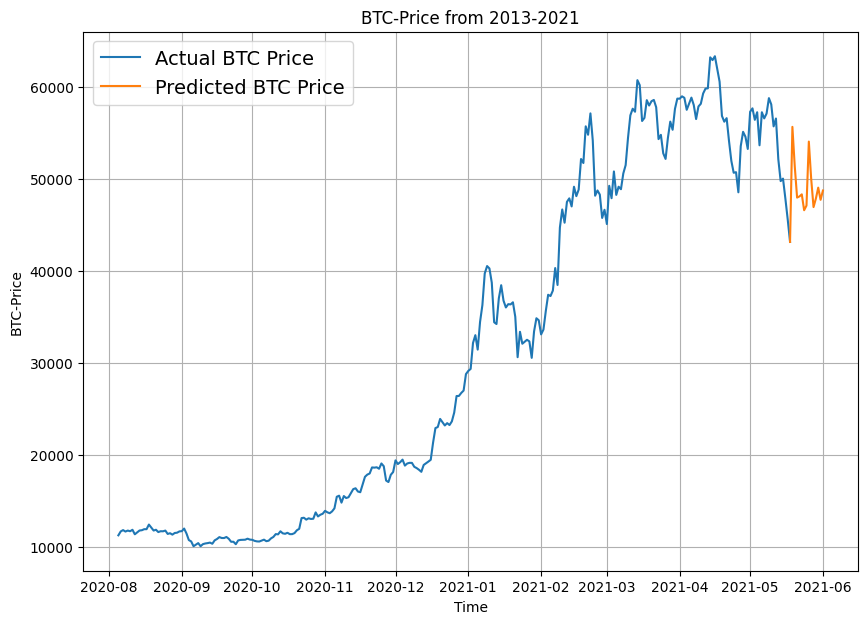

In [174]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_pirces.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")